In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
data = pd.read_csv('student_health_data.csv')
print(data.head(10))
print(data.columns)

   Student_ID  Age Gender  Heart_Rate  Blood_Pressure_Systolic  \
0           1   24      M   50.663217               122.173015   
1           2   21      F   57.926042               110.778407   
2           3   22      M   59.294219               109.375673   
3           4   24      M   76.826232               125.142227   
4           5   20      M   68.342769               107.515592   
5           6   22      M   61.744152                90.000000   
6           7   22      F   93.097228               106.677782   
7           8   24      F   63.361031               115.396783   
8           9   19      F   81.671029               142.820977   
9          10   20      M   86.211086               112.635938   

   Blood_Pressure_Diastolic  Stress_Level_Biosensor  Stress_Level_Self_Report  \
0                 84.419860                3.137350                  9.028669   
1                 75.696145                3.699078                  5.819697   
2                 83.803814   

In [13]:
label_encoder=LabelEncoder()


for c in data.select_dtypes(include=['object']).columns:
    data[c]=label_encoder.fit_transform(data[c])
    
features = [
    'Blood_Pressure_Diastolic', 'Stress_Level_Biosensor',
       'Stress_Level_Self_Report', 'Physical_Activity', 'Sleep_Quality',
       'Mood', 'Study_Hours', 'Project_Hours'
]
target=['Health_Risk_Level']

x=data[features]
y=data['Health_Risk_Level']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2024)

In [15]:
rf_model=RandomForestClassifier(random_state=2024)
rf_model.fit(x_train,y_train)

dt_model=DecisionTreeClassifier(random_state=2024)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2024)

In [17]:
rfy_pred=rf_model.predict(x_test)
dty_pred=dt_model.predict(x_test)

accuracy = accuracy_score(y_test, rfy_pred)
accuracy = accuracy_score(y_test, dty_pred)

# 결과 출력
print("랜덤 포레스트 성능 평가:")
print(f"정확도(Accuracy): {accuracy:.4f}")
print("\n분류 리포트(Classification Report):")
print(classification_report(y_test, rfy_pred))

print("결정 트리 성능 평가:")
print(f"정확도(Accuracy): {accuracy:.4f}")
print("\n분류 리포트(Classification Report):")
print(classification_report(y_test, dty_pred))

랜덤 포레스트 성능 평가:
정확도(Accuracy): 1.0000

분류 리포트(Classification Report):
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      1.00      1.00        16
           2       0.99      1.00      0.99        69

    accuracy                           0.99       100
   macro avg       1.00      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

결정 트리 성능 평가:
정확도(Accuracy): 1.0000

분류 리포트(Classification Report):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        69

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



C:\Users\microsoft\AppData\Local\Temp\ipykernel_5524\4275501423.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Perfect Prediction')
C:\Users\microsoft\AppData\Local\Temp\ipykernel_5524\4275501423.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Perfect Prediction')


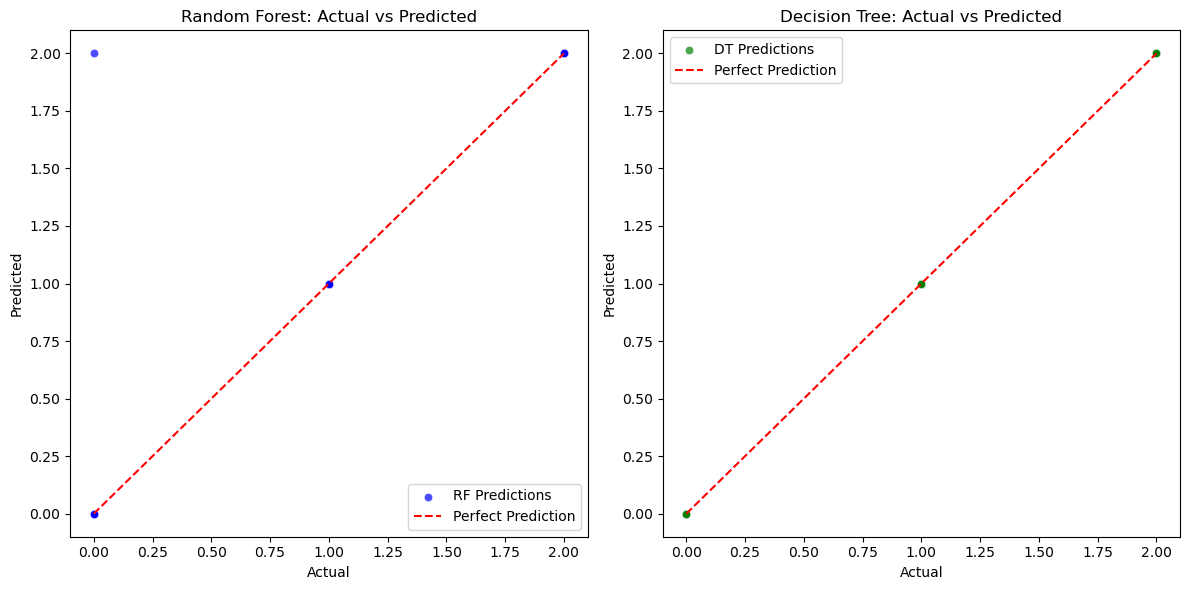

In [19]:
plt.figure(figsize=(12, 6))

# Random Forest predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=rfy_pred, alpha=0.7, color='blue', label='RF Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Perfect Prediction')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# Decision Tree predictions
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=dty_pred, alpha=0.7, color='green', label='DT Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Perfect Prediction')
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

plt.tight_layout()
plt.show()

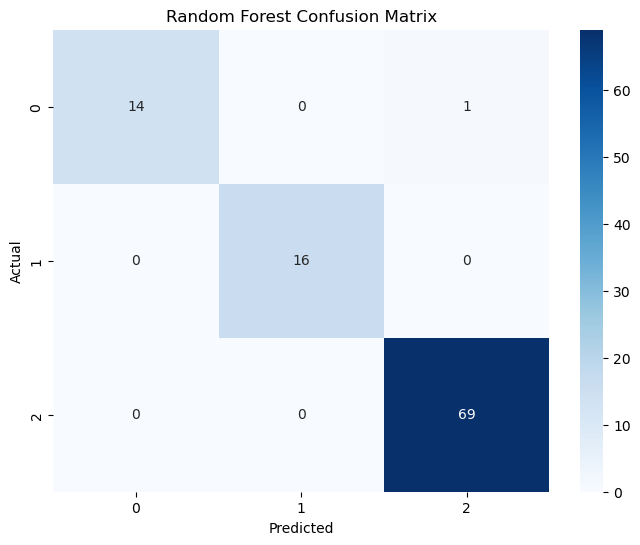

In [21]:
from sklearn.metrics import confusion_matrix

rf_conf_matrix = confusion_matrix(y_test, rfy_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
dt_conf_matrix = confusion_matrix(y_test, dty_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()